# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder

In [2]:
# import dataset
dataset = pd.read_csv(r"C:\Users\idris\House_price.csv")
dataset

,HouseAge,Bedroom,FullBath,LotArea,Location,SalePrice
0,2003,3,2,8450,Urban,208500
1,1976,3,2,9600,SubUrban,181500
2,2001,3,2,11250,Rural,223500
3,1915,3,1,9550,Urban,140000
4,2000,4,2,14260,SubUrban,250000
...,...,...,...,...,...,...
1455,1999,3,2,7917,Urban,175000
1456,1978,3,2,13175,SubUrban,210000
1457,1941,4,2,9042,Urban,266500
1458,1950,2,1,9717,SubUrban,142125


## Dataset Sanity check

In [3]:
dataset.shape

(1460, 6)

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HouseAge   1460 non-null   int64 
 1   Bedroom    1460 non-null   int64 
 2   FullBath   1460 non-null   int64 
 3   LotArea    1460 non-null   int64 
 4   Location   1460 non-null   object
 5   SalePrice  1460 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


In [6]:
dataset.describe()

,HouseAge,Bedroom,FullBath,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,2.866438,1.565068,10516.828082,180921.195890
std,30.202904,0.815778,0.550916,9981.264932,79442.502883
min,1872.000000,0.000000,0.000000,1300.000000,34900.000000
25%,1954.000000,2.000000,1.000000,7553.500000,129975.000000
50%,1973.000000,3.000000,2.000000,9478.500000,163000.000000
75%,2000.000000,3.000000,2.000000,11601.500000,214000.000000
max,2010.000000,8.000000,3.000000,215245.000000,755000.000000


In [7]:
# subtract 2024 from all the rows in HouseAge Column
HouseAge = []

for a in dataset['HouseAge']:
    age = 2024 - a
    HouseAge.append(age)
    
HouseAge
len(HouseAge)

1460

In [8]:
dataset['HouseAge'] = HouseAge

## Data visualisation

Check for Outliers

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseAge'>

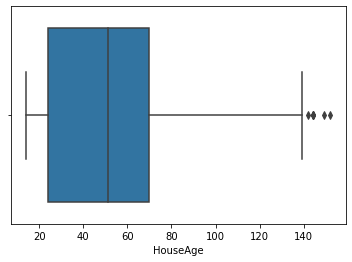

In [9]:
sns.boxplot(dataset['HouseAge'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedroom'>

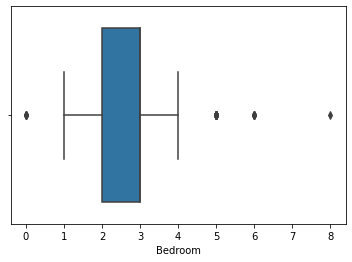

In [10]:
sns.boxplot(dataset['Bedroom'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FullBath'>

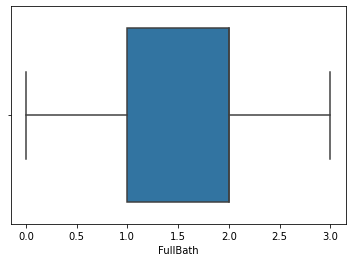

In [11]:
sns.boxplot(dataset['FullBath'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

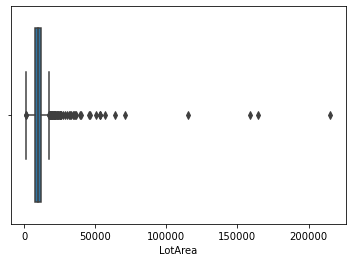

In [12]:
sns.boxplot(dataset['LotArea'])

In [13]:
# remove outliers

In [14]:
def remove_outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    
    # finding IQR
    IQR = Q3-Q1
    
    # finding boundaries
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    
    # remove outliers
    new_df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    
    return new_df

In [15]:
dataset = remove_outliers(dataset, 'HouseAge')

In [16]:
dataset = remove_outliers(dataset, 'Bedroom')

In [17]:
dataset = remove_outliers(dataset, 'LotArea')

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseAge'>

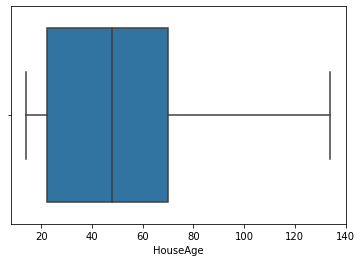

In [18]:
sns.boxplot(dataset['HouseAge'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HouseAge', ylabel='Density'>

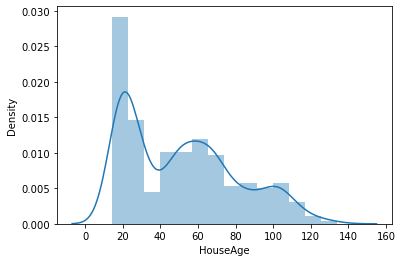

In [19]:
sns.distplot(dataset['HouseAge'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HouseAge'>

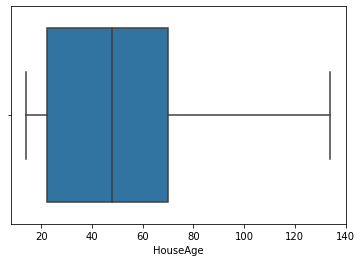

In [20]:
sns.boxplot(dataset['HouseAge'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bedroom', ylabel='Density'>

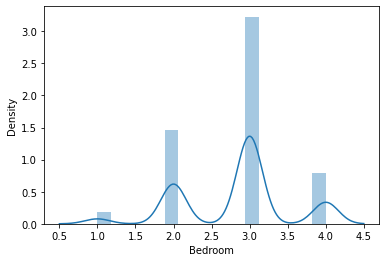

In [21]:
sns.distplot(dataset['Bedroom'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

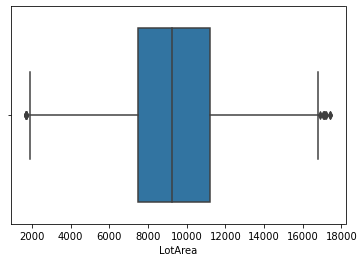

In [22]:
sns.boxplot(dataset['LotArea'])

In [23]:
dataset = remove_outliers(dataset, 'LotArea')

C:\Users\idris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

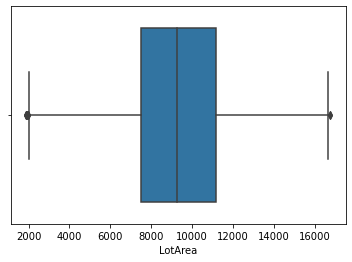

In [24]:
sns.boxplot(dataset['LotArea'])

C:\Users\idris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

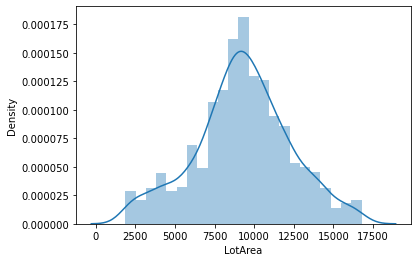

In [25]:
sns.distplot(dataset['LotArea'])

In [26]:
dataset = dataset.reset_index()
dataset = dataset.drop('index', axis=1)

## Split the data set into X and y

In [27]:
X = dataset.iloc[:, :-1]

In [28]:
X

,HouseAge,Bedroom,FullBath,LotArea,Location
0,21,3,2,8450,Urban
1,48,3,2,9600,SubUrban
2,23,3,2,11250,Rural
3,109,3,1,9550,Urban
4,24,4,2,14260,SubUrban
...,...,...,...,...,...
1320,25,3,2,7917,Urban
1321,46,3,2,13175,SubUrban
1322,83,4,2,9042,Urban
1323,74,2,1,9717,SubUrban


In [29]:
y = dataset.iloc[:, [-1]]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1320,175000
1321,210000
1322,266500
1323,142125


In [30]:
X

,HouseAge,Bedroom,FullBath,LotArea,Location
0,21,3,2,8450,Urban
1,48,3,2,9600,SubUrban
2,23,3,2,11250,Rural
3,109,3,1,9550,Urban
4,24,4,2,14260,SubUrban
...,...,...,...,...,...
1320,25,3,2,7917,Urban
1321,46,3,2,13175,SubUrban
1322,83,4,2,9042,Urban
1323,74,2,1,9717,SubUrban


## Data preprocessing

In [31]:
# Convert 'Location' column to numeric
label_encoder = LabelEncoder()
X['Location'] = label_encoder.fit_transform(X['Location'])

X

,HouseAge,Bedroom,FullBath,LotArea,Location
0,21,3,2,8450,2
1,48,3,2,9600,1
2,23,3,2,11250,0
3,109,3,1,9550,2
4,24,4,2,14260,1
...,...,...,...,...,...
1320,25,3,2,7917,2
1321,46,3,2,13175,1
1322,83,4,2,9042,2
1323,74,2,1,9717,1


In [32]:
# scaling the columns with MinMaxScaler

numeric_features = ['HouseAge', 'Bedroom', 'FullBath', 'LotArea', 'Location']
numeric_transformer = MinMaxScaler()

In [33]:
# inserting the scaler into the column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [34]:
# define the model
base_estimator = ExtraTreesRegressor(
    n_estimators=200,
    random_state=0
    )

In [35]:
# inserting the scaler and the model into the column pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', base_estimator)
])


## Data Splitting

Splitting the data into test and train set

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [37]:
# Train the model
model.fit(X_train, y_train)

C:\Users\idris\anaconda3\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['HouseAge', 'Bedroom',
                                                   'FullBath', 'LotArea',
                                                   'Location'])])),
                ('regressor',
                 ExtraTreesRegressor(n_estimators=200, random_state=0))])

In [38]:
# make predictions with the model
y_pred = model.predict(X_test)

## Model Evaluation

In [39]:
# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'r2: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

r2: 0.7275851313432636
Mean Absolute Error: 28597.31117610063
Mean Squared Error: 1606448683.9170122
Root Mean Squared Error: 40080.52749050357


## Result visualisation

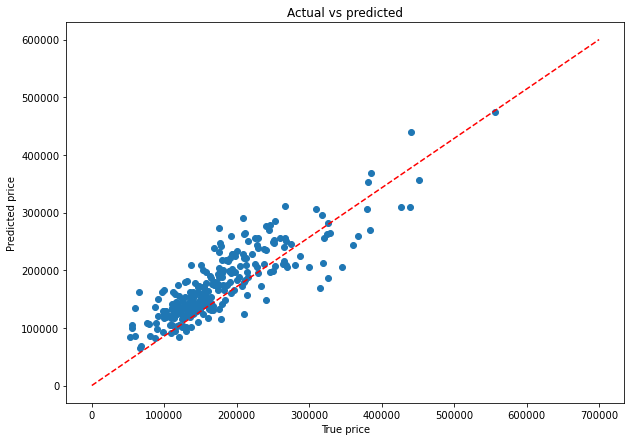

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(y_test.values, y_pred)
plt.plot([0, 700000], [0,600000], '--r')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Actual vs predicted')
plt.show()

In [41]:
# create a pickle file using serialisation
import pickle
pickle_out = open('HousePrediction.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close

<function BufferedWriter.close>